In [159]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [237]:
dataset.shape

(768, 9)

In [238]:
dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [175]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(df.iloc[:,:7], df.iloc[:,8], test_size = 0.1, random_state=42)

In [176]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((691, 7), (691,), (77, 7), (77,))

In [215]:
neighbors = np.arange(1,27,step=2)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
#knn = KNeighborsClassifier(n_neighbors=)

In [207]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data, train_label)
    train_accuracy[i] = knn.score(train_data, train_label)
    test_accuracy[i] = knn.score(test_data, test_label)

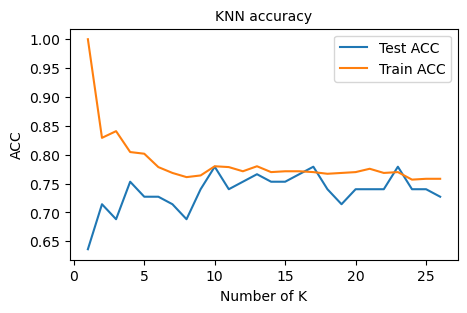

In [208]:
plt.figure(figsize=(5,3))
plt.title("KNN accuracy", fontsize = 10)
plt.plot(neighbors, test_accuracy, label="Test ACC")
plt.plot(neighbors, train_accuracy, label="Train ACC")
plt.legend(prop = {"size" : 10})
plt.xlabel("Number of K", fontsize = 10)
plt.ylabel("ACC", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [209]:
# Find the index of the maximum test accuracy
best_k_index = np.argmax(test_accuracy)

# Find the corresponding best K
best_k = neighbors[best_k_index]

# Print the result
print(f"The best K is: {best_k} with a test accuracy of {test_accuracy[best_k_index]:.4f}")

The best K is: 10 with a test accuracy of 0.7792


In [211]:
knn = KNeighborsClassifier(n_neighbors= 10) #一般不能超过样本数据个数的平方根，选奇数（分类模型中）
knn.fit(train_data, train_label)

train_accuracy = knn.score(train_data, train_label)
test_accuracy = knn.score(test_data, test_label)

In [212]:
print(test_accuracy)

0.7792207792207793


In [213]:
from sklearn.metrics import confusion_matrix

prediction = knn.predict(test_data)
confusion_matrix(test_label, prediction)

array([[47,  3],
       [14, 13]])

In [214]:
from sklearn.metrics import classification_report

print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        50
           1       0.81      0.48      0.60        27

    accuracy                           0.78        77
   macro avg       0.79      0.71      0.73        77
weighted avg       0.79      0.78      0.76        77



# 优化模型
- 样本集拆分
- 超参数调整
- 数据清洗（The most important）